## Sentiment Prediction
After lebaling all the text data, I am going to build a classifier to do the prediction based on TextBlob and my model

In [1]:
# import related libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras.utils.np_utils import to_categorical
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/My Drive/Internship CS778/reddit'

In [ ]:
import os
os.chdir(PATH)
!ls

4_topic_output_filename.html   output_filename.html
7_topic_output_filename.html   reddit_au_label2.csv
au_topic.csv		       reddit_au_label.csv
au_topic_time.csv	       reddit_ca_label2.csv
Comments_AUtop500.csv	       reddit_ca_label.csv
Comments_CAtop500.csv	       reddit_global_label.csv
Comments_Coronavirustop20.csv  reddit_uk_label2.csv
Comments_globaltop50.csv       reddit_uk_label.csv
Comments_UKtop500.csv	       reddit_us_label2.csv
Comments_UStop500.csv	       reddit_us_label.csv
COVID_AU_national.csv	       test_dataset.json
lda_tuning_results.csv	       topic_case.csv
lda_tuning_results.gsheet      train_dataset.json


In [ ]:
# google colab file system
from google.colab import files
import io
uploaded = files.upload()

In [ ]:
# Load data
comments = pd.read_csv('reddit_global_label.csv')

* CountVectorizer just counts the word frequencies.(bag of words) 

* With the TFIDFVectorizer the value increases proportionally to count, but is offset by the frequency of the word in the corpus. - This is the IDF (inverse document frequency part).

In [ ]:
# Convert a collection of text documents to a matrix of token counts
c_vectorizer = CountVectorizer() 
t_vectorizer = TfidfVectorizer()
cv = c_vectorizer.fit_transform(comments.text)
tv = t_vectorizer.fit_transform(comments.text)

In [ ]:
# split the training and text set/Set a random state to make sure the result is the same everytime I run the code

c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(cv, comments['sentiment'],test_size = 0.25, random_state = 5)
t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(tv, comments['sentiment'],test_size = 0.25, random_state = 5)

**Naive Bayes classifiers** 

are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence 

* The Multinomial Naive Bayes simply lets us know that each p(fi|c) is a multinomial distribution, rather than some other distribution. 
* ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. 

In [ ]:
#fit(features_matrix, item_we_want_to_predict)
mnb = MultinomialNB()
cnb = ComplementNB()


In [ ]:
#defining the model
#compilimg the model -> we are going to use already used models MNB and CNB
#fitting the model
print("Vader pretrained model\n")
print("bag of word score")
mnb.fit(c_x_train, c_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(c_x_test), c_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(c_x_train, c_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(c_x_test), c_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

print("tfidf score")

mnb.fit(t_x_train, t_y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(t_x_test), t_y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(t_x_train, t_y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(t_x_test), t_y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

Vader pretrained model

bag of word score
accuracy_score_mnb = 69.74%
accuracy_score_cnb = 71.17%
tfidf score
accuracy_score_mnb = 66.42%
accuracy_score_cnb = 72.26%


As we can see the kaggle model is very stable in bag of word and tfidf vectorizer. It even got better accuracy rate in Multinomial Naive Bayes with tfidf vectorization 

In [ ]:
# print the classification report
print("Vader pretrained model report\n")
mnb_bow_report = classification_report(c_y_test,mnb.predict(c_x_test),target_names = ['negative','neutral','positive'])
print('bag of word')
print(mnb_bow_report)
mnb_tfidf_report = classification_report(t_y_test,mnb.predict(t_x_test),target_names = ['negative','neutral','positive'])
print('tfidf')
print(mnb_tfidf_report)


Vader pretrained model report

bag of word
              precision    recall  f1-score   support

    negative       0.72      0.79      0.75     20781
     neutral       0.95      0.20      0.34     13854
    positive       0.64      0.88      0.74     24411

    accuracy                           0.69     59046
   macro avg       0.77      0.62      0.61     59046
weighted avg       0.74      0.69      0.65     59046

tfidf
              precision    recall  f1-score   support

    negative       0.74      0.73      0.73     20781
     neutral       0.93      0.18      0.30     13854
    positive       0.60      0.89      0.72     24411

    accuracy                           0.66     59046
   macro avg       0.76      0.60      0.58     59046
weighted avg       0.73      0.66      0.62     59046



Confusion Matrix

Textblob pretrained model



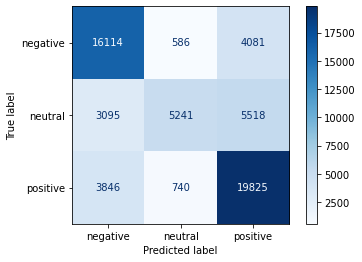

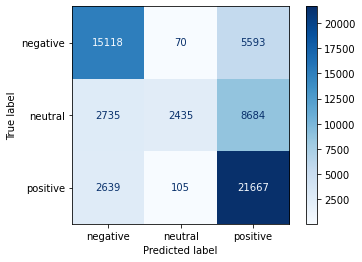

In [ ]:
print("Textblob pretrained model\n")
plot_confusion_matrix(mnb.fit(c_x_train, c_y_train), c_x_test, c_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')
plot_confusion_matrix(mnb.fit(t_x_train, t_y_train), t_x_test, t_y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

I think the in-balance data in different sentiments affect the performance of the model

## Use SMOTE to balance the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(cv, comments['sentiment'], test_size=0.25, random_state=5)

smote = SMOTE("minority")
X_train, y_train = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#defining the model
#compilimg the model -> we are going to use already used models MNB and CNB
#fitting the model
print("Vader pretrained model\n")
print("bag of word score")
mnb.fit(X_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(mnb.predict(X_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

cnb.fit(X_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(cnb.predict(X_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

Vader pretrained model

bag of word score
accuracy_score_mnb = 74.17%
accuracy_score_cnb = 72.06%


In [ ]:
# print the classification report
print("Vader pretrained model report\n")
mnb_bow_report = classification_report(y_test,mnb.predict(X_test),target_names = ['negative','neutral','positive'])
print('bag of word')
print(mnb_bow_report)

Vader pretrained model report

bag of word
              precision    recall  f1-score   support

    negative       0.73      0.76      0.75     20781
     neutral       0.80      0.61      0.69     13854
    positive       0.73      0.80      0.76     24411

    accuracy                           0.74     59046
   macro avg       0.75      0.72      0.73     59046
weighted avg       0.75      0.74      0.74     59046



Textblob pretrained model



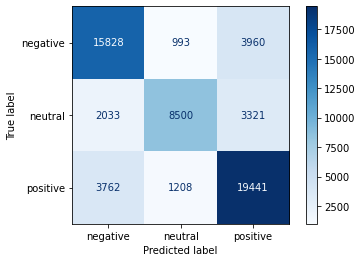

In [ ]:
print("Textblob pretrained model\n")
plot_confusion_matrix(mnb.fit(X_train, y_train), X_test, y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

## Support Vector Machine

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(cv, comments['sentiment'], test_size=0.25, random_state=5)

smote = SMOTE("minority")
X_train, y_train = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Undersampling the Majority

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(cv, comments['sentiment'], test_size=0.25, random_state=5)
undersample = RandomUnderSampler(sampling_strategy={'positive':5000,'neutral':5000,'negative':5000})
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = undersample.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape

(15000, 79258)

In [ ]:
# This is another resampling method
from sklearn.utils import resample
undersample = resample(not_cancer, 
                       replace=True, 
                       n_samples=len(cancer), #set the number of samples to equal the number of the minority class
                       random_state=42)
# Returning to new training set
undersample_train = pd.concat([cancer, undersample])

In [ ]:
from sklearn import svm

In [ ]:
svm_linear = svm.SVC(kernel='linear')

In [ ]:
svm_linear.fit(X_train, y_train)
accuracy_score_svm = metrics.accuracy_score(svm_linear.predict(X_test), y_test)
print('accuracy_score_svm_linear = '+str('{:4.2f}'.format(accuracy_score_svm*100))+'%')

accuracy_score_svm_linear = 77.23%


In [ ]:
print("My model report\n")
svm_bow_report = classification_report(y_test,svm_linear.predict(X_test),target_names = ['negative','neutral','positive'])
print(svm_bow_report)

My model report

              precision    recall  f1-score   support

    negative       0.76      0.73      0.75     20781
     neutral       0.71      0.89      0.79     13854
    positive       0.83      0.74      0.78     24411

    accuracy                           0.77     59046
   macro avg       0.77      0.79      0.77     59046
weighted avg       0.78      0.77      0.77     59046



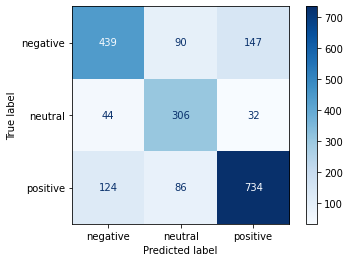

In [ ]:
plot_confusion_matrix(svm_linear.fit(X_train, y_train), X_test, y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

In [ ]:
df_test.head()

,content,sentiment
0,#ArianaGrande Ari By Ariana Grande 80% Full ht...,neutral
1,Ariana Grande KIIS FM Yours Truly CD listening...,positive
2,Ariana Grande White House Easter Egg Roll in W...,positive
3,#CD #Musics Ariana Grande Sweet Like Candy 3.4...,positive
4,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...,neutral


##  Logistic Regression

In [ ]:
import sklearn
lr = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(cv, comments['sentiment'], test_size=0.25, random_state=5)

smote = SMOTE("minority")
X_train, y_train = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lr.fit(X_train, y_train)
accuracy_score_lr = metrics.accuracy_score(lr.predict(X_test), y_test)
print('accuracy_score_lr = '+str('{:4.2f}'.format(accuracy_score_lr*100))+'%')

accuracy_score_lr = 84.23%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("My model report\n")
lr_bow_report = classification_report(y_test,lr.predict(X_test),target_names = ['negative','neutral','positive'])
print(lr_bow_report)

My model report

              precision    recall  f1-score   support

    negative       0.87      0.78      0.82     20781
     neutral       0.77      0.92      0.84     13854
    positive       0.87      0.85      0.86     24411

    accuracy                           0.84     59046
   macro avg       0.84      0.85      0.84     59046
weighted avg       0.85      0.84      0.84     59046



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


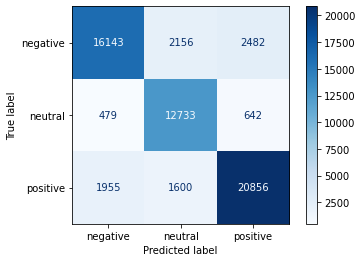

In [ ]:
plot_confusion_matrix(lr.fit(X_train, y_train), X_test, y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

##  K Nearest Neighbors 

In [ ]:
from sklearn import metrics, neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, n_jobs=1)

In [ ]:
knn.fit(X_train, y_train)
accuracy_score_knn = metrics.accuracy_score(knn.predict(X_test), y_test)
print('accuracy_score_knn = '+str('{:4.2f}'.format(accuracy_score_knn*100))+'%')

accuracy_score_knn = 48.15%


In [ ]:
print("My model report\n")
knn_bow_report = classification_report(y_test,knn.predict(X_test),target_names = ['negative','neutral','positive'])
print(knn_bow_report)

My model report

              precision    recall  f1-score   support

    negative       0.73      0.29      0.41     20781
     neutral       0.34      0.96      0.50     13854
    positive       0.80      0.37      0.51     24411

    accuracy                           0.48     59046
   macro avg       0.62      0.54      0.47     59046
weighted avg       0.67      0.48      0.47     59046



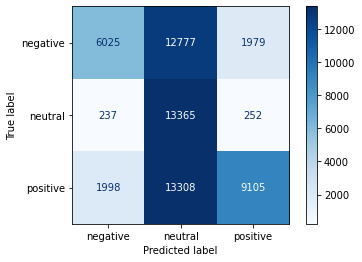

In [ ]:
plot_confusion_matrix(knn.fit(X_train, y_train), X_test, y_test,display_labels=['negative','neutral','positive'],cmap="Blues",values_format = '')

## Mickey's

In [ ]:
#@title
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from nltk.collocations import *
from PIL import Image

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('gazetteers')

In [ ]:
#@title
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()

def preprocessing(columntitle):
    
    #convert all to lower case
    columntitle = columntitle.str.lower()
    #replace line breaks
    columntitle = columntitle.replace('\r', ' ').replace('\n', ' ')
    #replace punctuation
    columntitle = columntitle.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)) )
    #remove stop word
    columntitle = columntitle.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))
    #remove link
    columntitle = columntitle.apply(lambda x: re.sub(r'\(?http\S+', '', str(x)))
    #Lemmatization 
    lemmatized = [lemmatizer.lemmatize(word) for word in columntitle]
    columntitle = columntitle.apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]
        ) )
    return columntitle

In [ ]:
#@title
alltext = preprocessing(df_test['content'])

In [ ]:
#@title
mask = alltext.str.len() <=1
alltext = alltext[~mask]

In [ ]:
#@title
df_test['content'] = alltext

In [ ]:
#@title
df_train.tail(20)

In [ ]:
#@title
# Convert a collection of text documents to a matrix of token counts
c_vectorizer = CountVectorizer() 
t_vectorizer = TfidfVectorizer()
X_train =c_vectorizer.transform(X_train.astype('U'))
X_test =c_vectorizer.transform(X_test.astype('U'))
#tv = t_vectorizer.fit_transform(comments.text)

In [ ]:
#@title
X_train = df_train.content
y_train = df_train.sentiment
X_test = df_test.content
y_test = df_test.sentiment

In [ ]:
#@title
undersample = RandomUnderSampler(sampling_strategy={'positive':3000,'neutral':3000,'negative':3000})
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = undersample.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#@title
X_train.shape

(20632, 29923)

In [ ]:
#@title
svm_linear.fit(X_train, y_train)
accuracy_score_svm = metrics.accuracy_score(svm_linear.predict(X_test), y_test)
print('accuracy_score_svm_linear = '+str('{:4.2f}'.format(accuracy_score_svm*100))+'%')

accuracy_score_svm_linear = 52.68%


In [ ]:
#@title
svm_linear.fit(X_train, y_train)
accuracy_score_svm = metrics.accuracy_score(svm_linear.predict(X_test), y_test)
print('accuracy_score_svm_linear = '+str('{:4.2f}'.format(accuracy_score_svm*100))+'%')

accuracy_score_svm_linear = 55.36%


## ML Model Plot

In [2]:
#precision
ml = pd.DataFrame({'Models':['RNN-LSTM(RM)','SVM','NB','LR','KNN'],'Accuracy':[95.25, 77.23, 74.12, 84.23, 54.26],
                   'Negative':[97, 76, 76, 87, 73],
                  'Neutral':[97, 71, 71, 77, 34],
                  'Positive':[95, 83, 83, 87, 80]})
ml

,Models,Accuracy,Negative,Neutral,Positive
0,RNN-LSTM(RM),95.25,97,97,95
1,SVM,77.23,76,71,83
2,NB,74.12,76,71,83
3,LR,84.23,87,77,87
4,KNN,54.26,73,34,80


Text(0.5, 0, 'models')

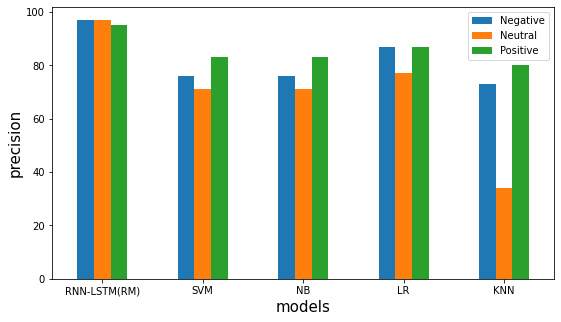

In [3]:
ax = ml.plot(x="Models", y=["Negative", "Neutral", "Positive"], kind="bar",figsize=(9,5),rot=0)
ax.set_ylabel("precision", fontsize=15)
ax.set_xlabel("models", fontsize=15)

In [4]:
#recall
ml2 = pd.DataFrame({'Models':['RNN-LSTM(RM)','SVM','NB','LR','KNN'],'Accuracy':[95.25, 77.23, 74.12, 84.23, 54.26],
                   'Negative':[93, 73, 73, 78, 29],
                  'Neutral':[91, 89, 89, 92, 96],
                  'Positive':[97, 74, 74, 85, 37]})
ml2

,Models,Accuracy,Negative,Neutral,Positive
0,RNN-LSTM(RM),95.25,93,91,97
1,SVM,77.23,73,89,74
2,NB,74.12,73,89,74
3,LR,84.23,78,92,85
4,KNN,54.26,29,96,37


Text(0.5, 0, 'models')

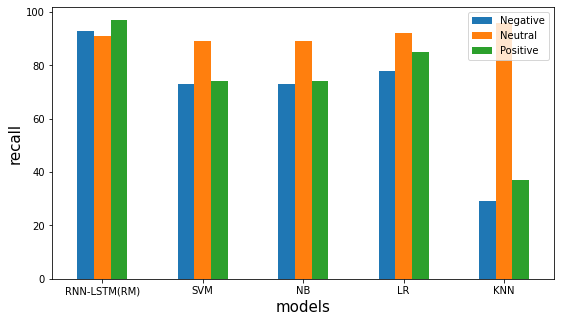

In [5]:
ax = ml2.plot(x="Models", y=["Negative", "Neutral", "Positive"], kind="bar",figsize=(9,5),rot=0)
ax.set_ylabel("recall", fontsize=15)
ax.set_xlabel("models", fontsize=15)

In [ ]:
ml.to_csv('ml.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


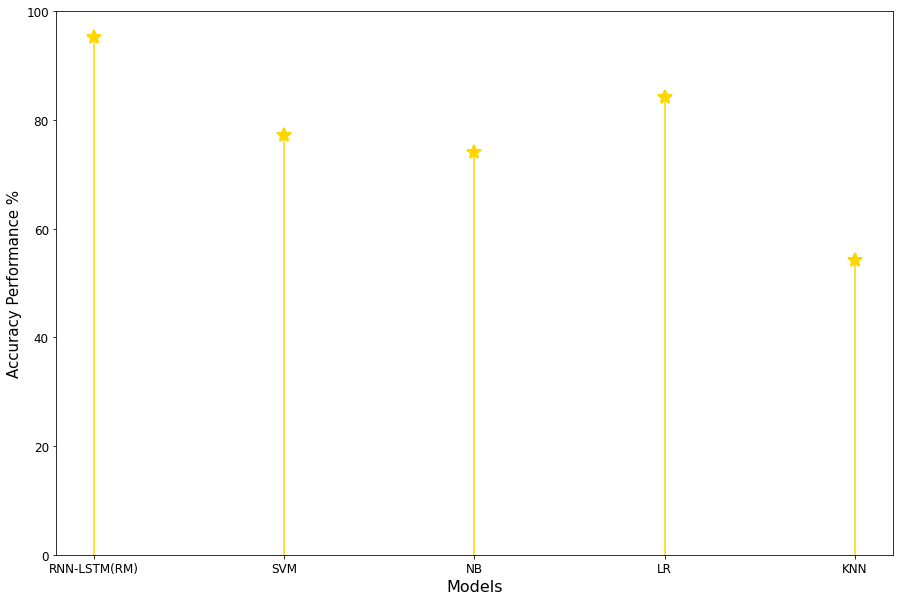

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

(markerline, stemlines, baseline) = plt.stem(ml['Models'],
                                             ml['Accuracy']) #ml['Negative F1'],ml['Neutral F1'],ml['Positive F1'],

                                             
plt.setp(markerline, marker='*', markersize=15,
         markeredgewidth=2, color='gold')
plt.setp(stemlines, color='gold')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=12)
plt.xlabel('Models', size=16)
plt.ylabel('Accuracy Performance %', size=15)
plt.ylim(bottom=0)
plt.gcf().set_size_inches(15, 10)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


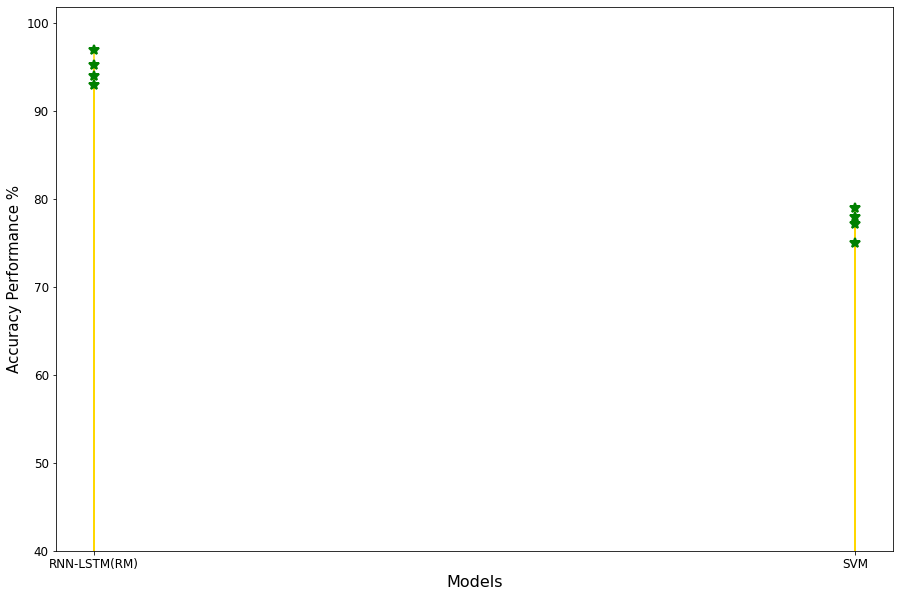

In [ ]:
model1 = [95.25,77.23]
stem1 = ['RNN-LSTM(RM)''SVM']

model = [95.25,94,97,93,77.23,75,79,78]
stem = ['RNN-LSTM(RM)','RNN-LSTM(RM)','RNN-LSTM(RM)','RNN-LSTM(RM)','SVM','SVM','SVM','SVM']

(markerline, stemlines, baseline) = plt.stem(stem,
                                             model) #ml['Negative F1'],ml['Neutral F1'],ml['Positive F1'],

                                             
plt.setp(markerline, marker='*', markersize=10,
         markeredgewidth=2, color='gold')
plt.setp(stemlines, color='gold')
plt.setp(baseline, visible=False)

plt.setp(markerline, marker='*', markersize=10,
         markeredgewidth=2, color='green')
#plt.setp(stemlines1, color='green')
#plt.setp(baseline1, visible=False)


plt.tick_params(labelsize=12)
plt.xlabel('Models', size=16)
plt.ylabel('Accuracy Performance %', size=15)
plt.ylim(bottom=40)
plt.gcf().set_size_inches(15, 10)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.show()